In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\91897\\Downloads\laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
for i in df.columns:
    
    #print(df[i].unique())
    print(i)
    print('No of Unique Values:',df[i].nunique())
    print('-'*80)

Unnamed: 0
No of Unique Values: 1303
--------------------------------------------------------------------------------
Company
No of Unique Values: 19
--------------------------------------------------------------------------------
TypeName
No of Unique Values: 6
--------------------------------------------------------------------------------
Inches
No of Unique Values: 18
--------------------------------------------------------------------------------
ScreenResolution
No of Unique Values: 40
--------------------------------------------------------------------------------
Cpu
No of Unique Values: 118
--------------------------------------------------------------------------------
Ram
No of Unique Values: 9
--------------------------------------------------------------------------------
Memory
No of Unique Values: 39
--------------------------------------------------------------------------------
Gpu
No of Unique Values: 110
---------------------------------------------------------------

In [4]:
print('Shape Of DataFrame:',df.shape)
print('\r')

print('No of Duplicated Rows:',df.duplicated().sum())
print('\r')
df.info()

Shape Of DataFrame: (1303, 12)

No of Duplicated Rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Dataset Doesnt have any Duplicated Rows

#  Data Preprocessing

In [5]:
# Dropping The id column
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# Converting Ram Column into integer type
df['Ram']=df['Ram'].str.split('GB').str[0]
df['Ram']=df['Ram'].astype(int)

In [7]:
# Converting Weight Column into float type
df['Weight']=df['Weight'].str.split('kg').str[0].astype('float32')

In [8]:
# Checking the value counts in ScreenResolution column
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [9]:
# Creating new column name TouchScreen from ScreenResolution column if it contain TouchScreen
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [10]:
# Creating new column name IPS from ScreenResolution column if it contain IPS
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [11]:
# Creating new column name y_resolution from ScreenResolution column by splitting by multiply 'x' sign
df['y_resolution']=df['ScreenResolution'].str.split('x').str[1]

In [12]:
# Creating new column name x_resolution from ScreenResolution column
new=df['ScreenResolution'].str.split('x',n=1,expand=True)
df['x_resolution']=new[0]
df['x_resolution']=df['x_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [13]:
df['x_resolution']=df['x_resolution'].astype(int)
df['y_resolution']=df['y_resolution'].astype(int)

In [14]:
# Creating new column PPI (Pixels Per Inch)
df['PPI']=(np.sqrt((df['x_resolution']**2)+(df['y_resolution']**2)))/df['Inches']
df['PPI']=df['PPI'].astype('float32')

In [15]:
df['Cpu'].value_counts()[0:40]

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In Total we have 100+ unique values of Cpu form total of 1302 rows of data 

In [16]:
# Creating a new column by spliting Cpu Column by ' ' and joining the first 3 values by that slpit
df['CpuName']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [17]:
print('Total unique values in CpuName:', df['CpuName'].nunique())
print('\r')
df['CpuName'].value_counts()

Total unique values in CpuName: 40



Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [18]:
def cpu_name(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [19]:
# Creating New column by name CPU Brand from newly created column CpuName
df['CPU Brand']=df['CpuName'].apply(cpu_name)

In [20]:
df['CPU Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU Brand, dtype: int64

In [21]:
print('Total unique values in Memory:', df['Memory'].nunique())
print('\r')
df['Memory'].value_counts()

Total unique values in Memory: 39



256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [22]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split('+',n=1,expand=True)

df['First']=new[0]
df['First']=df['First'].str.strip()

df['Second']=new[1]

df['Layer1HDD']=df['First'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['First'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['First'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['First'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['First']=df['First'].str.replace(r'\D','')

df['Second'].fillna('0',inplace=True)

df['Layer2HDD']=df['Second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['Second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['Second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['Second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['Second']=df['Second'].str.replace(r'\D','')

df['First']=df['First'].astype(int)
df['Second']=df['Second'].astype(int)

df['HDD']=(df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD'])
df['SSD']=(df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD'])
df['Hybrid']=(df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['First']*df['Layer1Flash_Storage']+df['Second']*df['Layer2Flash_Storage'])


C:\Users\91897\AppData\Local\Temp\ipykernel_16144\3476805742.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['First']=df['First'].str.replace(r'\D','')
C:\Users\91897\AppData\Local\Temp\ipykernel_16144\3476805742.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second']=df['Second'].str.replace(r'\D','')


In [23]:
df.corr()['Price']

Inches                 0.068197
Ram                    0.743007
Weight                 0.210370
Price                  1.000000
TouchScreen            0.191226
IPS                    0.252208
y_resolution           0.552809
x_resolution           0.556529
PPI                    0.473487
First                 -0.122365
Second                 0.295004
Layer1HDD             -0.426121
Layer1SSD              0.513609
Layer1Hybrid          -0.039386
Layer1Flash_Storage   -0.210823
Layer2HDD              0.298374
Layer2SSD              0.023611
Layer2Hybrid           0.105004
Layer2Flash_Storage         NaN
HDD                   -0.096441
SSD                    0.670799
Hybrid                 0.007989
Flash_Storage         -0.040511
Name: Price, dtype: float64

In [24]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1,0,0,0,0,0,0,0,128


In [25]:
print('Total unique values in Gpu',df['Gpu'].nunique())
print('\r')
df['Gpu'].value_counts()[0:50]

Total unique values in Gpu 110



Intel HD Graphics 620           281
Intel HD Graphics 520           185
Intel UHD Graphics 620           68
Nvidia GeForce GTX 1050          66
Nvidia GeForce GTX 1060          48
Nvidia GeForce 940MX             43
AMD Radeon 530                   41
Intel HD Graphics 500            39
Intel HD Graphics 400            37
Nvidia GeForce GTX 1070          30
Intel HD Graphics                29
Nvidia GeForce GTX 1050 Ti       28
AMD Radeon R5 M430               22
Nvidia GeForce 930MX             20
AMD Radeon 520                   17
Nvidia GeForce MX150             15
Intel HD Graphics 515            15
Intel HD Graphics 615            14
AMD Radeon R7 M445               14
Nvidia GeForce GTX 960M          14
Nvidia GeForce 920MX             13
Intel HD Graphics 505            12
AMD Radeon R5                    11
Nvidia GeForce GTX 980M          10
Intel HD Graphics 405             9
Nvidia Quadro M1200               9
AMD Radeon R5 M420                8
Intel Iris Plus Graphics 640

In [26]:
# Creating New Coulmn Name GpuBrand by just taking the first value from column Gpu
df['Gpu Brand']=df['Gpu'].str.split(' ').str[0]

In [27]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [28]:
df=df[df['Gpu Brand']!='ARM']

In [29]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

In [30]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [31]:
def os(x):
    if x=='Windows 10' or x=='Windows 7' or x=='Windows 10 S':
        return 'Windows OS'
    elif x=='macOS' or x=='Mac OS X':
        return 'Mac OS'
    else:
        return 'Others OS/Linux/etc...'

In [32]:
# Creating New coulmn name OS by taking the name of their Company from column OpSys
df['OS']=df['OpSys'].apply(os)

In [33]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage,Gpu Brand,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,0,0,0,0,128,0,0,Intel,Mac OS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,0,0,0,0,0,0,128,Intel,Mac OS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,0,0,0,256,0,0,Intel,Others OS/Linux/etc...
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,0,0,0,0,512,0,0,AMD,Mac OS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,0,0,0,0,256,0,0,Intel,Mac OS


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1302 non-null   object 
 1   TypeName             1302 non-null   object 
 2   Inches               1302 non-null   float64
 3   ScreenResolution     1302 non-null   object 
 4   Cpu                  1302 non-null   object 
 5   Ram                  1302 non-null   int32  
 6   Memory               1302 non-null   object 
 7   Gpu                  1302 non-null   object 
 8   OpSys                1302 non-null   object 
 9   Weight               1302 non-null   float32
 10  Price                1302 non-null   float64
 11  TouchScreen          1302 non-null   int64  
 12  IPS                  1302 non-null   int64  
 13  y_resolution         1302 non-null   int32  
 14  x_resolution         1302 non-null   int32  
 15  PPI                  1302 non-null   f

# Visualization and EDA

C:\Users\91897\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


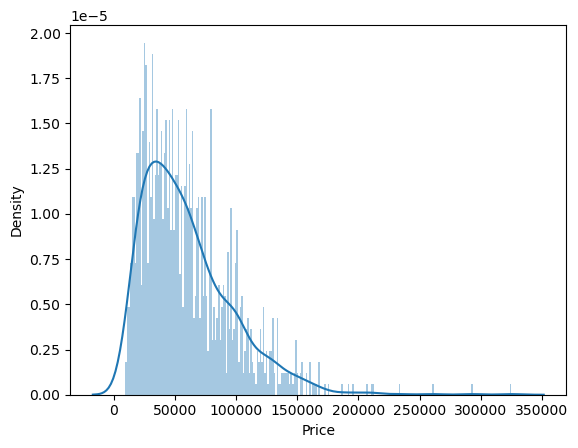

In [35]:
sns.distplot(df['Price'],bins=250)
plt.show()

Data is Right Skewed means majority of the products lies near to 50k(25k to 75k) price range.

<AxesSubplot:>

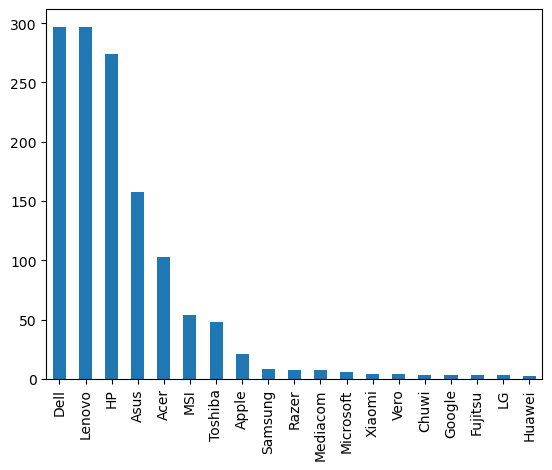

In [36]:
df['Company'].value_counts().plot(kind='bar')

Dataset is dominated by 5 brands
1. Dell
2. Lenovo
3. HP
4. Asus
5. Acer

Meanwhile other popular brands like Apple,Samsung, Xiaomi doesnt have that much bigger share.

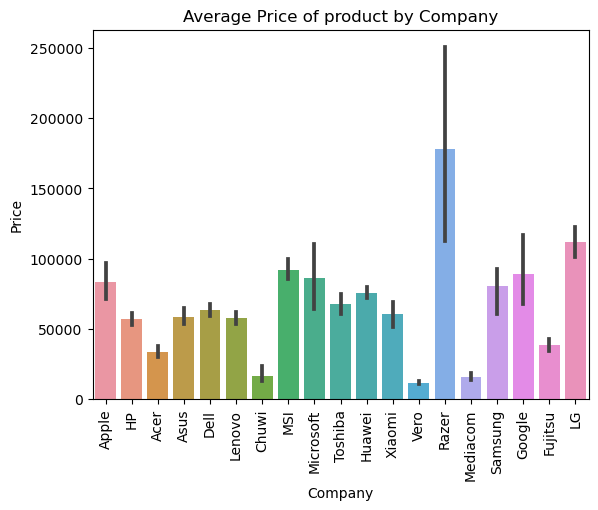

In [37]:
plt.title('Average Price of product by Company')
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Top 5 companies by sales i.e Dell,Lenovo,HP,Asus,Acer all 5 of them are comparatively cheaper then Apple and Samsung.

Razer, LG, Google are costlier

Notebook shares the highest market share followed by Gaming and Ultrabook

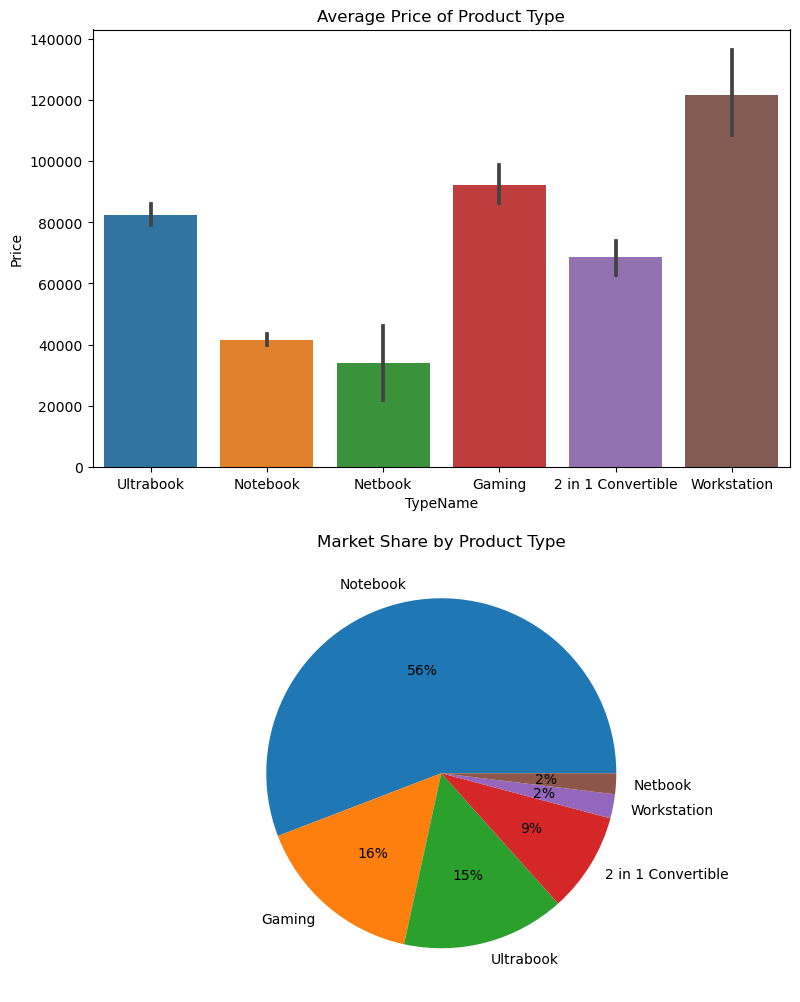

In [38]:
plt.figure(figsize=(9,12.5))

plt.subplot(2,1,1)
plt.title('Average Price of Product Type')
sns.barplot(x=df['TypeName'],y=df.Price)

plt.subplot(2,1,2)
TypeName=df['TypeName'].value_counts()
TypeName.reset_index()
plt.pie(TypeName,autopct='%0.0f%%',labels=TypeName.index)
plt.title('Market Share by Product Type')
plt.show()

We directly see the inverse relation of Prouct type and their Price.

Workstation are the costliest one and covers least market share.

Notebooks are the cheapest ones and covers majority of market share by 56%.

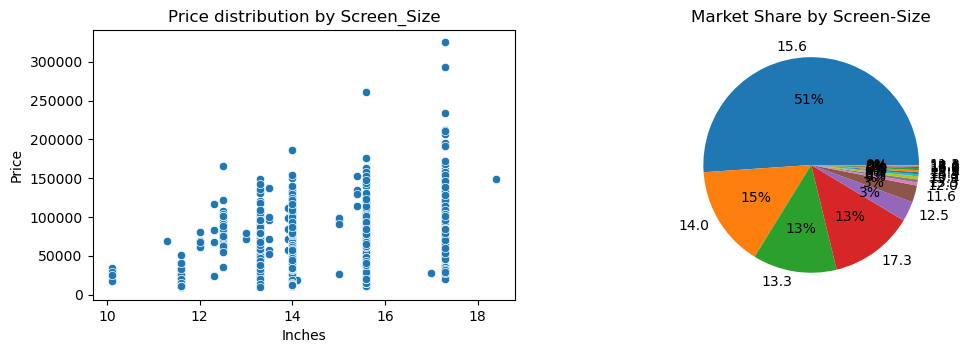

In [39]:
plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.title('Price distribution by Screen_Size')
sns.scatterplot(x=df.Inches,y=df.Price)

plt.subplot(1,2,2)
inc=df['Inches'].value_counts()
inc.reset_index()
plt.pie(inc,autopct='%0.0f%%',labels=inc.index)
plt.title('Market Share by Screen-Size')
plt.show()

From the graph we observe that Screen Size is proportional to Price (except screen size range from 13.5 inches to 16 inches)

Meanwhile around half of the market size covers by laptop having screensize of 15.6 inches,followed by 15 % by 14 inches screen laptop then again followed by 13% each by 13.3inch and 17.3inches laptops.

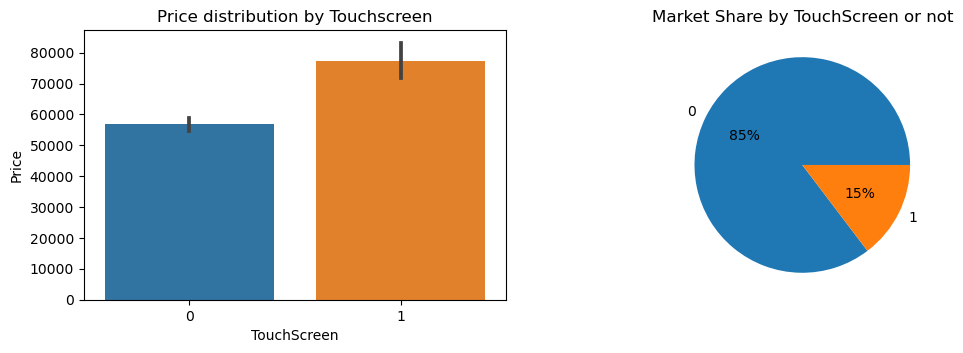

In [40]:
#print('Count of Touchscreen Values:')
#print(df.TouchScreen.value_counts())
plt.figure(figsize=(12,3.5))

plt.subplot(1,2,1)
plt.title('Price distribution by Touchscreen')
sns.barplot(x=df['TouchScreen'],y=df.Price)

plt.subplot(1,2,2)
tc=df['TouchScreen'].value_counts()
tc.reset_index()
plt.pie(tc,autopct='%0.0f%%',labels=tc.index)
plt.title('Market Share by TouchScreen or not')
plt.show()

Here:

    0 means not a touchscreen
    1 means touchscreen
    
    
As usual touchscreen laptops are costlier then Laptops having no option of such a feature.

But overall Non-TouchScreen Laptops shares the market value of 85%.

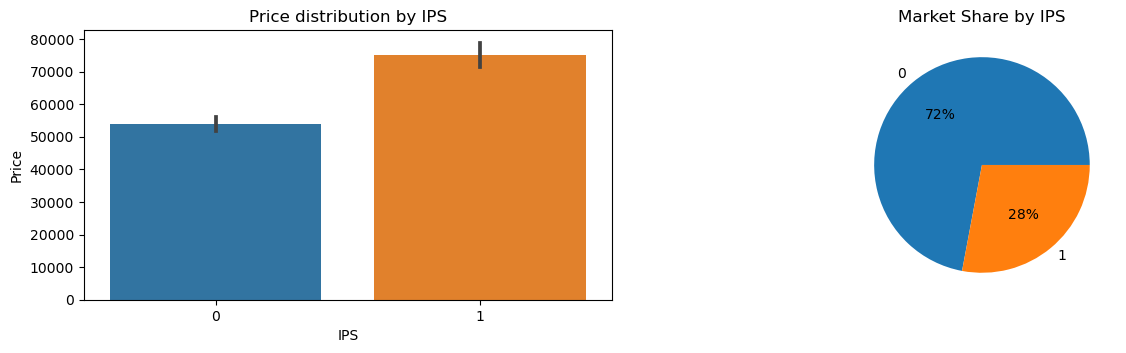

In [41]:
#print(df.IPS.value_counts())
plt.figure(figsize=(15,3.5))

plt.subplot(1,2,1)
plt.title('Price distribution by IPS')
sns.barplot(x=df.IPS,y=df.Price)


plt.subplot(1,2,2)
pie=df['IPS'].value_counts()
pie.reset_index()
plt.pie(pie,autopct='%0.0f%%',labels=pie.index)
plt.title('Market Share by IPS')

plt.subplots_adjust(right=0.9)
plt.show()

Laptops having IPS are significantly costlier then Laptops without IPS.

But Non-IPS Laptops covers 72% value by market share.

NameError: name 'c' is not defined

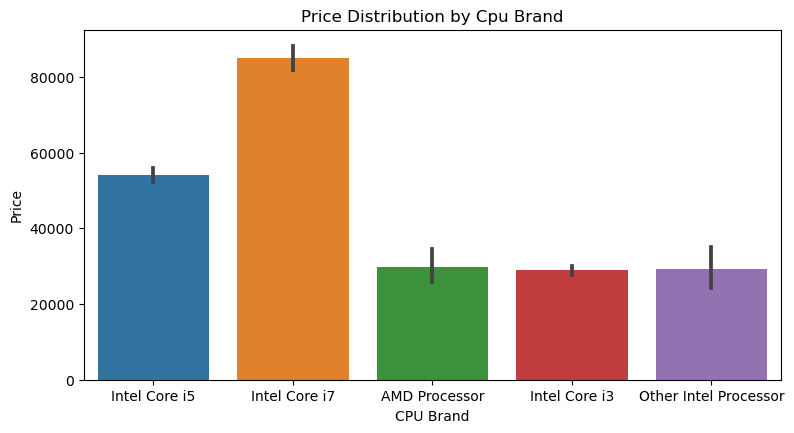

In [42]:
#print(df['CPU Brand'].value_counts())

plt.figure(figsize=(9,10))

plt.subplot(2,1,1)
plt.title('Price Distribution by Cpu Brand')
sns.barplot(x=df['CPU Brand'],y=df.Price)

c

People tend to buy latest technology more even if it was costlier.

Intel Core i7 is the costliest but also having the highest market share,followed by Intel Core i5 and so on.

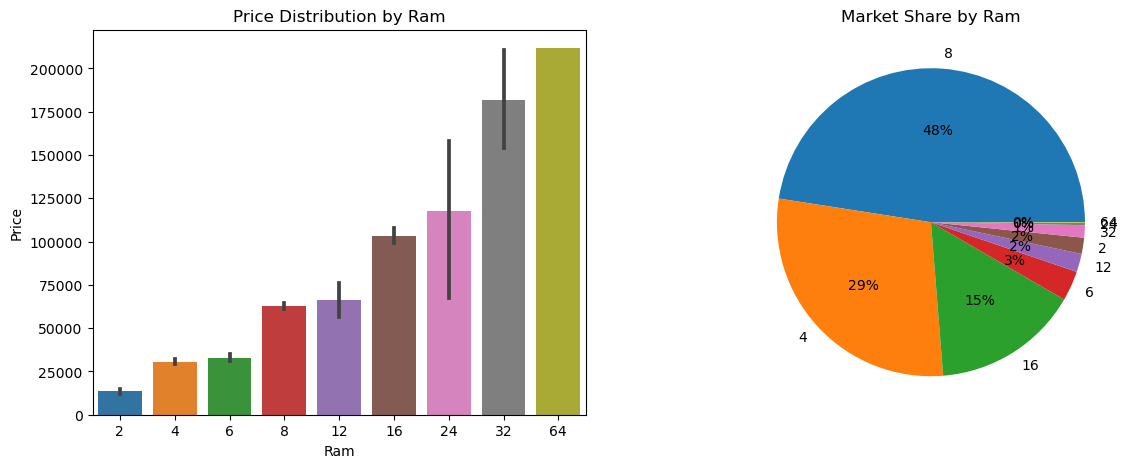

In [43]:
#print(df.Ram.value_counts())

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Price Distribution by Ram')
sns.barplot(x=df.Ram,y=df.Price)

plt.subplot(1,2,2)
ram=df['Ram'].value_counts()
ram.reset_index()
plt.pie(ram,autopct='%0.0f%%',labels=ram.index)
plt.title('Market Share by Ram')
plt.show()


People tends to buy laptop more having Ram of 8 GB and 4 GB Ram and both of them are comparatively cheaper.

Costliest Ram of 64 GB and 32 GB are costliest one.

Higher the Ram's size more costly it will get.

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64


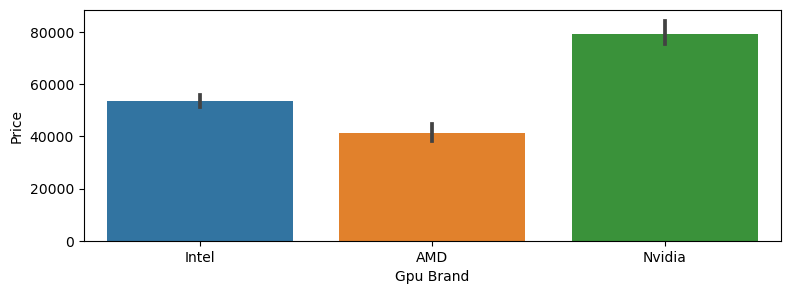

In [44]:
print(df['Gpu Brand'].value_counts())

plt.figure(figsize=(9,3))
sns.barplot(x=df['Gpu Brand'],y=df.Price)
plt.show()

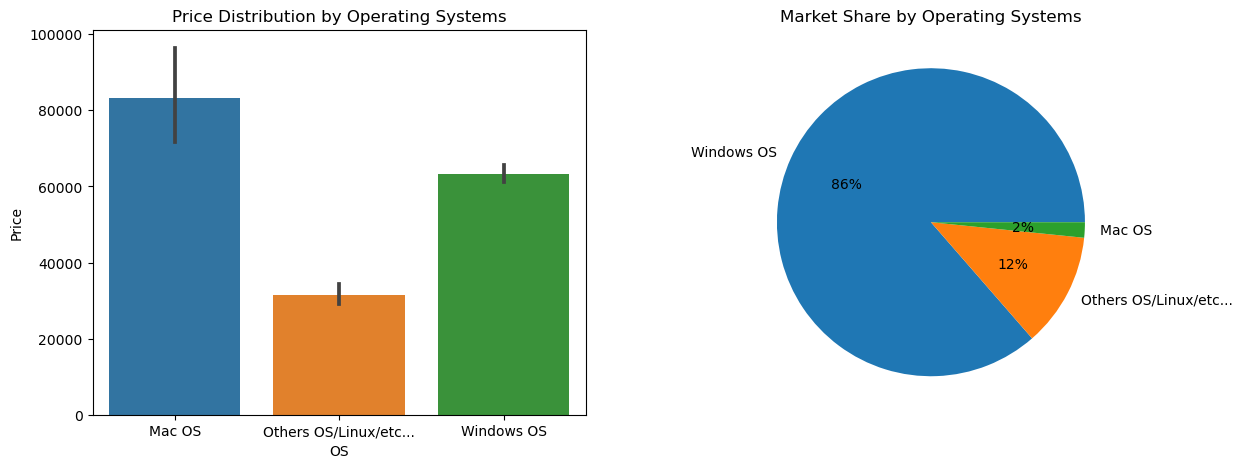

In [45]:
#print(df['OS'].value_counts())

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Price Distribution by Operating Systems')
#plt.figure(figsize=(9,3))
sns.barplot(x=df['OS'],y=df.Price)

plt.subplot(1,2,2)
OS=df['OS'].value_counts()
OS.reset_index()
plt.pie(OS,autopct='%0.0f%%',labels=OS.index)
plt.title('Market Share by Operating Systems')
plt.show()

Mac OS are costliest one to purchase so people tends to buy less them in amount.
Windows OS shares 86% of market share as a whole and comparatively moderate in price.

C:\Users\91897\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

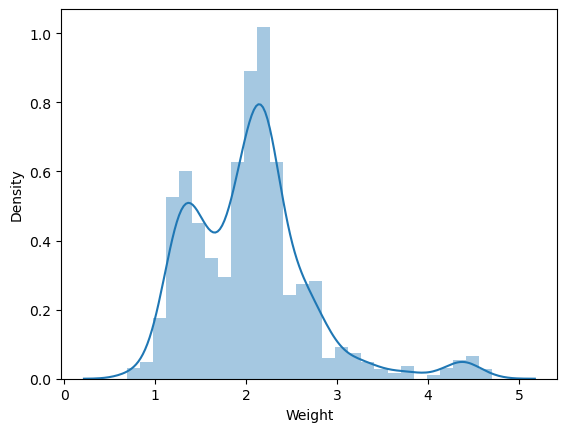

In [46]:
sns.distplot(df.Weight)

Majority of laptops weighs around 2kg to 2.5 kg followed by 1kg to 1.5kg.

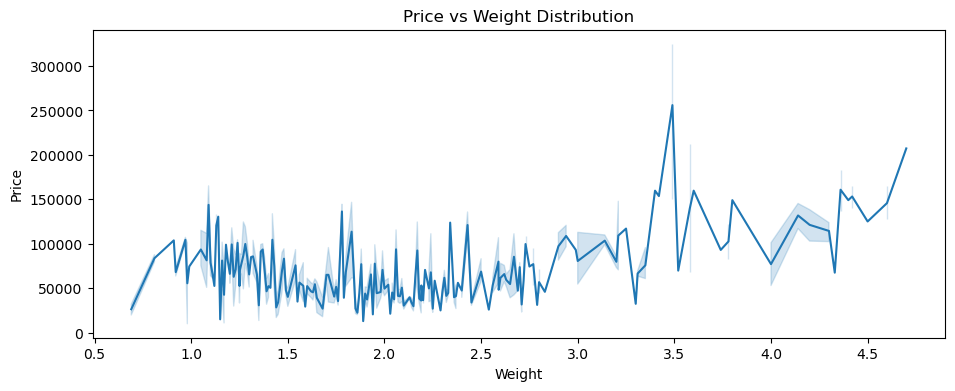

In [47]:
plt.figure(figsize=(11,4))
plt.title('Price vs Weight Distribution')
sns.lineplot(x=df.Weight,y=df.Price)
plt.show()

In [48]:
df.corr()['Price']

Inches                 0.067329
Ram                    0.742905
Weight                 0.209867
Price                  1.000000
TouchScreen            0.192917
IPS                    0.253320
y_resolution           0.554591
x_resolution           0.557369
PPI                    0.475368
First                 -0.123038
Second                 0.294860
Layer1HDD             -0.426584
Layer1SSD              0.513366
Layer1Hybrid          -0.039438
Layer1Flash_Storage   -0.210117
Layer2HDD              0.298227
Layer2SSD              0.023586
Layer2Hybrid           0.105002
Layer2Flash_Storage         NaN
HDD                   -0.096891
SSD                    0.670660
Hybrid                 0.007942
Flash_Storage         -0.040067
Name: Price, dtype: float64

Only Ram and SSD shows the highest correlation with Price.

###### We already Get required amount of New Columns in Data Preprocessing so have to drop all of such columns which are not usefull

In [49]:
df.drop(columns=['First','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Cpu','CpuName','Inches',
                 'ScreenResolution','y_resolution','x_resolution','Hybrid','Flash_Storage','Memory',
                'Gpu','OpSys'],axis=1,inplace=True)

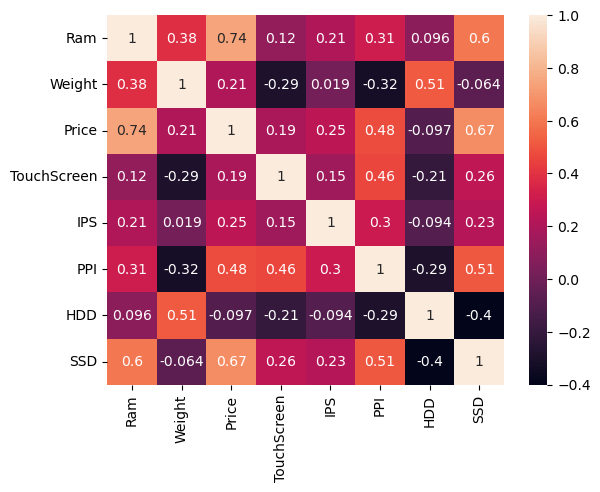

In [50]:
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\91897\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


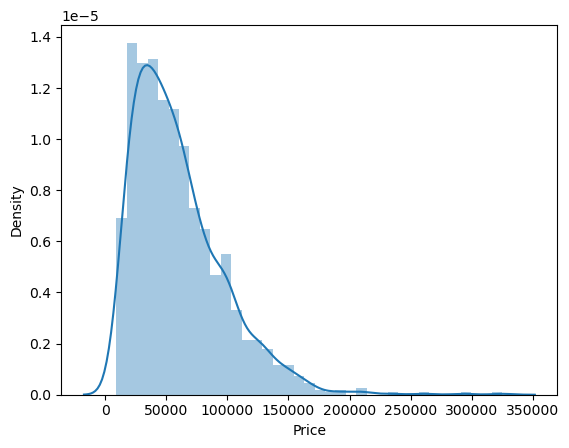

In [51]:
sns.distplot(df.Price)
plt.show()

Distplot shows skewness towards LEFT on PRICE so we have to deal with this..we can use Log method

C:\Users\91897\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

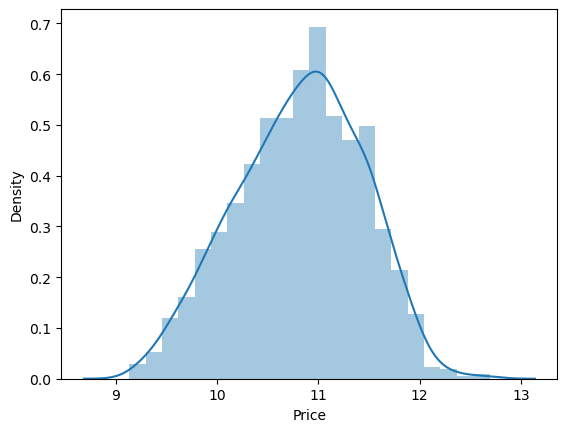

In [52]:
sns.distplot(np.log(df.Price))

# Machine Learning

In [53]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear Regression

In [56]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]) # Here this array [0,1,7,10,11] 
                                                                    #shows column index that need to be transformed by OHE
                                        ],remainder='passthrough')


step2=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8073277435584072
MAE Score: 0.21017828080372186


# Ridge Regression 

In [57]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=Ridge(alpha=10)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8127331017700293
MAE Score: 0.20926802324099172


# Lasso

In [58]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=Lasso(alpha=0.001)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8071853931274351
MAE Score: 0.21114361715169852


# KNN

In [59]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=KNeighborsRegressor(n_neighbors=5)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.800520031769417
MAE Score: 0.200720584998918


# Decision Tree

In [60]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=DecisionTreeRegressor(max_depth=10)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8275752046270345
MAE Score: 0.18923839711506954


# SVM

In [61]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8090031875919587
MAE Score: 0.2021434919871425


# Random Forest

In [62]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8873402378382488
MAE Score: 0.15860130110457718


# Extra Trees

In [63]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8753793123440623
MAE Score: 0.15979519126758127


# AdaBoost

In [64]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.7856267340592213
MAE Score: 0.2338824176985621


# Gradient Boost

In [65]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=GradientBoostingRegressor(n_estimators=500,random_state=7)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8837869631066252
MAE Score: 0.1588586804649899


# XGBoost

In [66]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2=XGBRegressor(n_estimators=100,random_state=3,max_depth=15,learning_rate=0.1)

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.888327230236885
MAE Score: 0.15377620775823753


#### As for now we have use many ML Algorithums but use only top performers for further ML process i.e

1. Random Forest Regressor-88.7%
2. Gradient Boosting Regressor-88.37%
3. XGBoost Regressor- 88.83%
4. Extra Trees Regressor-88.53%

# Voting Regressor

In [67]:
from sklearn.ensemble import VotingRegressor

In [68]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=500,random_state=7)
xgb=XGBRegressor(n_estimators=100,random_state=3,max_depth=15,learning_rate=0.1)
#lr=LinearRegression()
et=ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=15)


step2=VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8953742348318123
MAE Score: 0.15220946496333249


# Stacking Regressor

In [69]:
from sklearn.ensemble import StackingRegressor

In [70]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

estimators=[
    ('rf',RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=500,random_state=7)),
    ('xgb',XGBRegressor(n_estimators=100,random_state=3,max_depth=15,learning_rate=0.1)),
    ('lr',LinearRegression()),
    ('et',ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=15))
]

step2=StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE Score:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8945729507864528
MAE Score: 0.15378434165311114


#### Voting Regressor Surpaas every other algorithm with the predicted accuracy of 89.53%